In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../data/titanic/train.csv")
test_df = pd.read_csv("../data/titanic/test.csv")

In [3]:
combine = [train_df, test_df]
combine = combine[0]

1) Which features are available

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


5) Which features contain nulls?

In [6]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

6) What are feature datatypes?

In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

7) Distribution of numeric features?

In [9]:
train_df[["PassengerId", "Age", "SibSp", "Parch", "Fare"]].describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


8) Distribution of categorical features?

In [10]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df["Survived"] = train_df["Survived"].astype("category")
train_df[["Pclass", "Sex", "Embarked", "Survived"]].describe()

,Pclass,Sex,Embarked,Survived
count,891,891,889,891
unique,3,2,3,2
top,3,male,S,0
freq,491,577,644,549


9) Correlation between class and survival?

In [11]:
train_df[["Survived", "Pclass"]].loc[train_df.Pclass == 1].loc[train_df.Survived == 1].count() / train_df[["Survived", "Pclass"]].loc[train_df.Survived == 1].count()

Survived    0.397661
Pclass      0.397661
dtype: float64

10) Correlation between gender and survival?

In [12]:
train_df[["Sex", "Pclass"]].loc[train_df.Survived == 1].loc[train_df.Sex == "female"].count() / train_df[["Sex", "Pclass"]].loc[train_df.Survived == 1].count()

Sex       0.681287
Pclass    0.681287
dtype: float64

11) Survival and age histograms

In [13]:
train_df_age = train_df[train_df["Age"].notna()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119377fa0>]],
      dtype=object)

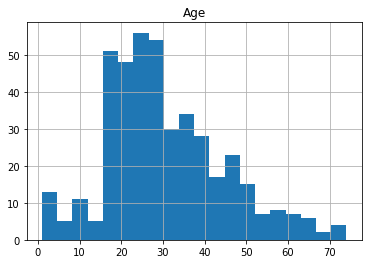

In [14]:
train_df_age.loc[train_df.Survived == 0].hist(column="Age", bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b41d220>]],
      dtype=object)

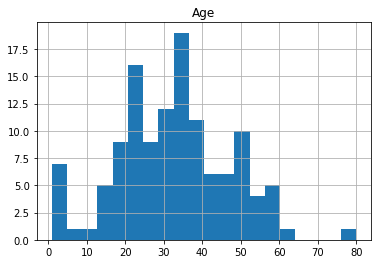

In [15]:
train_df_age.loc[train_df.Survived == 1].dropna().hist(column="Age", bins=20)

12) Histograms across age by class and survival

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b645100>,
      dtype=object)

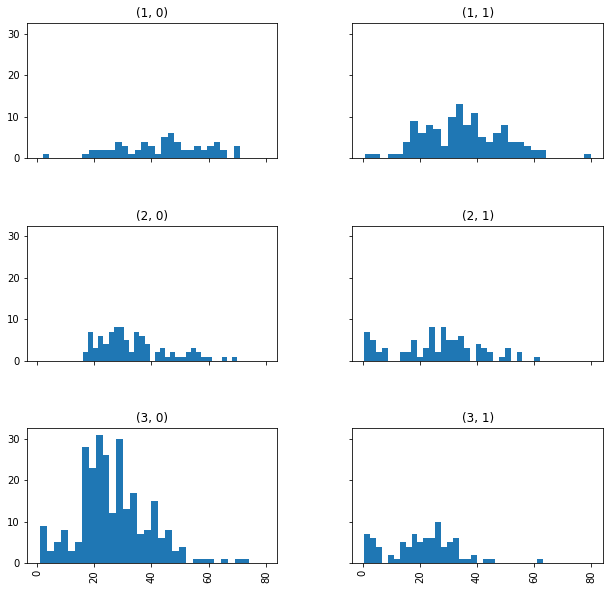

In [16]:
train_df_age.hist(column="Age", by=["Pclass", "Survived"], figsize=(10, 10), bins=30, sharey=True, sharex=True)

12) Bar plots of average fare by gender, embarked, and survived

In [17]:
avg_fare = train_df[["Sex", "Fare", "Embarked", "Survived"]].groupby(["Embarked", "Survived", "Sex"]).mean().reset_index()

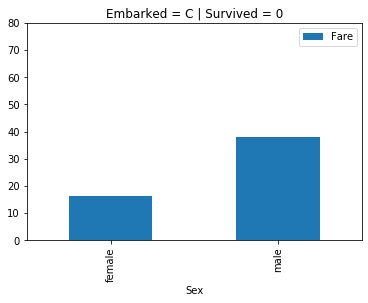

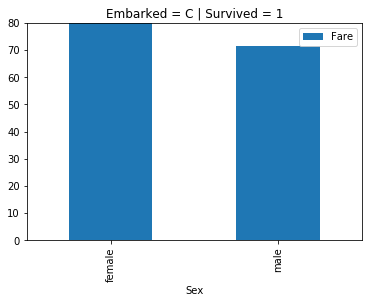

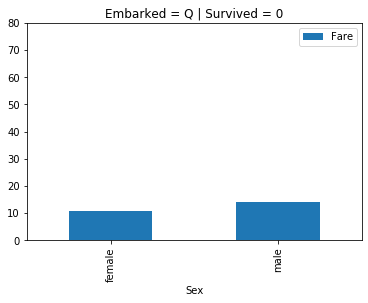

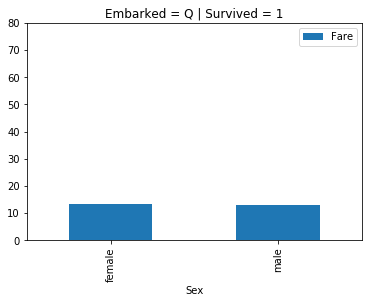

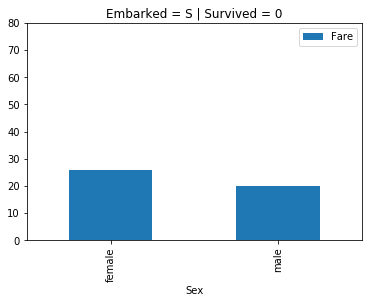

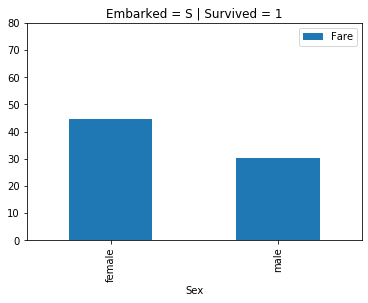

In [18]:
ports = ["C", "Q", "S"]
survival = [0, 1]

for port in ports:
    for didSurvive in survival:
        title="Embarked = "+port+" | Survived = "+str(didSurvive)
        avg_fare.loc[avg_fare.Embarked == port].loc[avg_fare.Survived == didSurvive].plot(x = "Sex", y="Fare", kind="bar", ylim=(0, 80), title=title)

14) What is ticket's rate of duplication? Is there a correlation with survival?

In [19]:
train_df.duplicated(subset="Ticket").value_counts()

False    681
True     210
dtype: int64

In [20]:
train_df.PassengerId.count()

891

In [21]:
train_df_ticketcat = train_df
train_df_ticketcat["Ticket"] = train_df["Ticket"].astype("category").cat.codes
train_df_ticketcat.corr()

,PassengerId,Age,SibSp,Parch,Ticket,Fare
PassengerId,1.000000,0.036847,-0.057527,-0.001652,-0.056554,0.012658
Age,0.036847,1.000000,-0.308247,-0.189119,-0.075934,0.096067
SibSp,-0.057527,-0.308247,1.000000,0.414838,0.079461,0.159651
Parch,-0.001652,-0.189119,0.414838,1.000000,0.020003,0.216225
Ticket,-0.056554,-0.075934,0.079461,0.020003,1.000000,-0.013885
Fare,0.012658,0.096067,0.159651,0.216225,-0.013885,1.000000


15) Is cabin complete? How many nulls exist in cabin across training and test data?

In [22]:
combine.Cabin.isna().sum()

687

16) Convert Sex to a numeric feature

In [23]:
train_df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [24]:
train_df["Gender"] = train_df["Sex"].astype("category").cat.codes

In [25]:
train_df["Gender"] = train_df["Gender"].replace({0:1, 1:0}) # The default ordering is the reverse of what the question asks for

In [26]:
train_df["Gender"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Gender, Length: 891, dtype: int64

17) Estimate null values in Age

In [27]:
train_df["Age"].fillna(train_df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

18) Fill missing values with the most common value in Embarked

In [28]:
train_df[["Embarked", "PassengerId"]].groupby("Embarked").count()

,PassengerId
Embarked,
C,168
Q,77
S,644


In [29]:
test_df[["Embarked", "PassengerId"]].groupby("Embarked").count()

,PassengerId
Embarked,
C,102
Q,46
S,270


In [30]:
train_df["Embarked"].fillna("S")
test_df["Embarked"].fillna("S")

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

19) Fill missing values in Fare with mode

In [31]:
train_df["Fare"].mode()

0    8.05
dtype: float64

In [32]:
train_df["Fare"].fillna(train_df["Fare"].mode())
test_df["Fare"].fillna(test_df["Fare"].mode())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

20) Convert Fare to ordinal values

In [33]:
test_df["Fare"] = pd.cut(test_df["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 512.329], right=True, labels=[0, 1, 2, 3])
train_df["Fare"] = pd.cut(train_df["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 512.329], right=True, labels=[0, 1, 2, 3])

In [34]:
train_df["Fare"]

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

NameError: name 'X' is not defined